# Análisis de activos financieros

* Se realizará un anális sobre la correlación entre activos financieros de USA con respecto a su tasa de interés (TNX - tasa a 10 años).

## Introducción.

* El CBOE Interest Rate 10 Year T Note (^TNX) es un índice que refleja el rendimiento del bono del Tesoro de los Estados Unidos a 10 años en el mercado secundario. Este índice es publicado por el Chicago Board Options Exchange (CBOE) y se utiliza como un indicador clave de las tasas de interés a largo plazo en los EE.UU.

**¿Por qué es importante ^TNX?**

* El rendimiento del bono del Tesoro a 10 años es una referencia clave en los mercados financieros. Cuando los rendimientos de los bonos suben, generalmente indica que los inversionistas esperan tasas de interés más altas en el futuro, lo que puede tener un impacto negativo en las acciones y otros activos de riesgo. Por otro lado, rendimientos más bajos suelen reflejar expectativas de menor crecimiento económico o inflación, y pueden ser favorables para los activos de riesgo.

**¿Por qué el Bono del Tesoro a 10 años?**

* Indicador de tasas de interés: Aunque la Reserva Federal (Fed) establece la tasa de interés a corto plazo (conocida como la tasa de los fondos federales), el rendimiento del bono del Tesoro a 10 años se considera un barómetro para las expectativas del mercado sobre las tasas de interés futuras, inflación y crecimiento económico.

* Influencia en otros tipos de interés: Las tasas de interés hipotecarias, los préstamos para automóviles y otras tasas de crédito a largo plazo a menudo están vinculadas al rendimiento del bono a 10 años.

# Parte 1. Extracción de datos

1. Importamos librerias.




In [ ]:
#!pip install plotly==5.13.1
#pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd

2. Establecemos tickers (siglas de los activos)



In [ ]:
tickers = ['SPY', 'GOLD', '^TNX']
precios = {}

In [ ]:
for ticker in tickers:

  precios[ticker] = yf.download(ticker, period= '10y')
  print(f"\n - Downloading tickers from: {ticker} \n")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed



 - Downloading tickers from: SPY 


 - Downloading tickers from: GOLD 



[*********************100%%**********************]  1 of 1 completed


 - Downloading tickers from: ^TNX 



In [ ]:
#Ejemplo de los datos.
precios[tickers[2]].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-25,2.386,2.410,2.386,2.387,2.387,0
2014-08-26,2.387,2.400,2.368,2.391,2.391,0
2014-08-27,2.368,2.389,2.359,2.361,2.361,0
2014-08-28,2.341,2.350,2.322,2.334,2.334,0
2014-08-29,2.345,2.354,2.325,2.343,2.343,0


In [ ]:
#Precios de cierre 'Adj Close' en un mismo Dataframe.

fecha = precios[tickers[0]].index
data_close = pd.DataFrame(index= fecha)

for ticker in tickers:
  data_close[ticker] = precios[ticker]['Adj Close']

In [ ]:
data_close.head(-5)

,SPY,GOLD,^TNX
Date,,,
2014-08-25,167.570175,15.037943,2.387
2014-08-26,167.678970,15.238342,2.391
2014-08-27,167.612000,15.171362,2.361
2014-08-28,167.519928,15.255086,2.334
2014-08-29,167.997040,15.397423,2.343
...,...,...,...
2024-08-12,533.270020,18.990000,3.909
2024-08-13,542.039978,19.129999,3.852
2024-08-14,543.750000,19.160000,3.820


# Parte 2. Gráficos y correlación de variables.

1. Hacemos un diagrama de pearson para calcular la correlación.

**Coeficiente de Correlación Lineal de Pearson (𝑟)**

**Uso:** Este es el método más utilizado cuando se quiere medir la fuerza y dirección de la relación lineal entre dos activos. El coeficiente de correlación puede tomar valores entre -1 y 1:

* **+1: Correlación positiva perfecta** (ambos activos se mueven en la misma dirección).

* **-1: Correlación negativa perfecta** (ambos activos se mueven en direcciones opuestas).

* **0: No hay correlación lineal** (no hay relación lineal entre los movimientos de los dos activos).

In [ ]:
data_close.corr(method='pearson')

,SPY,GOLD,^TNX
SPY,1.000000,0.565554,0.438535
GOLD,0.565554,1.000000,-0.246772
^TNX,0.438535,-0.246772,1.000000


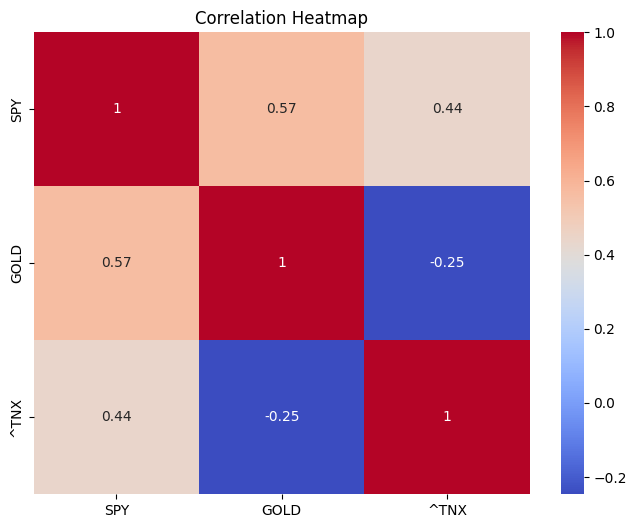

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data_close.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Análisis de los resultados

1. **Correlación entre SPY y GOLD (0.565554):**

**Interpretación:** Existe una correlación positiva moderada entre el precio del S&P 500 y el precio del oro. Esto sugiere que, en general, cuando el S&P 500 sube, el oro también tiende a subir, aunque no es una relación muy fuerte. Esto es interesante porque el oro suele ser considerado un activo refugio que a veces se mueve en la dirección opuesta a las acciones, pero aquí vemos una correlación positiva, que puede reflejar una situación de mercado donde ambos activos han subido juntos, quizás debido a políticas monetarias expansivas o condiciones económicas que benefician a ambos.

2. **Correlación entre SPY y ^TNX (0.438535):**


**Interpretación:** Hay una correlación positiva moderada entre el S&P 500 y la tasa de rendimiento del bono del Tesoro a 10 años. Esto significa que, en general, cuando las tasas de los bonos suben, el S&P 500 también tiende a subir. Esta relación podría deberse a expectativas de crecimiento económico, donde las tasas de interés suben junto con un mercado de acciones fuerte. Sin embargo, la relación no es muy fuerte, lo que sugiere que hay otros factores en juego.

3. **Correlación entre GOLD y ^TNX (-0.246772):**

**Interpretación:** Existe una correlación negativa débil entre el precio del oro y las tasas de los bonos a 10 años. Esto sugiere que, cuando las tasas de los bonos suben, el oro tiende a bajar, aunque esta relación no es fuerte. Esta es una relación más intuitiva, ya que las tasas de interés más altas a menudo disminuyen el atractivo del oro, que no paga intereses.

### Conclusiones Generales:

* SPY (S&P 500) muestra una correlación positiva moderada tanto con el oro como con la tasa de bonos a 10 años. Esto podría reflejar un entorno de mercado donde el crecimiento económico es fuerte, beneficiando a las acciones y donde el oro también está subiendo, quizás debido a temores inflacionarios o como respuesta a políticas monetarias expansivas.

* GOLD tiene una relación negativa con ^TNX, lo que es común en muchos períodos de tiempo, dado que el oro se ve menos atractivo cuando las tasas de interés reales (ajustadas por inflación) suben.

* El hecho de que ninguna de estas correlaciones sea extremadamente fuerte (es decir, cercana a 1 o -1) sugiere que los movimientos entre estos activos no están perfectamente sincronizados y que cada uno está influenciado por un conjunto diverso de factores económicos y financieros.

2. Relación entre dos variables.

In [ ]:
import plotly.graph_objects as go

# Create figure with secondary y-axis
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(x=fecha, y=data_close['GOLD'], name="Gold", yaxis='y1')
)
fig.add_trace(
    go.Scatter(x=fecha, y=data_close['^TNX'], name="^TNX", yaxis='y2')
)

# Create axis objects
fig.update_layout(
    xaxis=dict(domain=[0.05, 0.95]),
    yaxis=dict(title="Gold Value", titlefont=dict(color="#1f77b4")),
    yaxis2=dict(
        title="^TNX Value",
        titlefont=dict(color="#ff7f0e"),
        overlaying="y",
        side="right"
    )
)

# Set title and show the figure
fig.update_layout(
    title_text="Gold and ^TNX Over Time",
    width=1000,
)

fig.show()

**Comportamiento Inverso General:**

* A lo largo del tiempo, parece haber una **relación inversa** entre los precios del Oro (en azul) y la tasa de interés a 10 años (^TNX) (en rojo). Esto significa que cuando los rendimientos de los bonos del Tesoro a 10 años suben, el precio del oro tiende a bajar y viceversa.

* Este comportamiento **es consistente con la teoría financiera,** que sugiere que cuando las tasas de interés suben, el costo de oportunidad de mantener oro (que no paga intereses) también aumenta, lo que puede llevar a una disminución en la demanda y el precio del oro.

**Tendencias Específicas:**

* **En el período 2020-2021,** el precio del oro alcanzó su punto más alto, mientras que los rendimientos de los bonos a 10 años estuvieron relativamente bajos. Esto podría reflejar un período de incertidumbre económica (por ejemplo, la pandemia de COVID-19), donde los inversores buscaron refugio en activos como el oro, mientras que las tasas de interés fueron mantenidas bajas por los bancos centrales.

* **A partir de 2022,** se observa un aumento en la tasa de interés a 10 años (^TNX), coincidiendo con una caída en el precio del oro. Esto podría estar relacionado con las expectativas de inflación y las políticas monetarias más restrictivas por parte de la Reserva Federal de EE. UU.

In [ ]:
import plotly.graph_objects as go

# Create figure with secondary y-axis
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(x=fecha, y=data_close['SPY'], name="SPY", yaxis='y1')
)
fig.add_trace(
    go.Scatter(x=fecha, y=data_close['^TNX'], name="^TNX", yaxis='y2')
)

# Create axis objects
fig.update_layout(
    xaxis=dict(domain=[0.05, 0.95]),
    yaxis=dict(title="SPY Value", titlefont=dict(color="#1f77b4")),
    yaxis2=dict(
        title="^TNX Value",
        titlefont=dict(color="#ff7f0e"),
        overlaying="y",
        side="right"
    )
)

# Set title and show the figure
fig.update_layout(
    title_text="SPY and ^TNX Over Time",
    width=1000,
)

fig.show()

**Relación entre SPY y ^TNX:**

* En general, se observa que en los períodos donde la ^TNX (tasas de interés) aumenta, el SPY muestra cierta volatilidad o desaceleración en su tendencia alcista. Esto tiene sentido desde un punto de vista económico, ya que **tasas de interés más altas pueden aumentar los costos de financiamiento para las empresas**, reducir los márgenes de ganancia, y hacer que las acciones sean menos atractivas en comparación con otros activos de menor riesgo.
Por ejemplo, en 2022-2023, cuando la ^TNX subió considerablemente, el SPY experimentó una corrección, lo que podría indicar que los inversores estaban preocupados por los efectos de las tasas más altas en el crecimiento económico y las ganancias corporativas.

**Diversificación y Correlación:**

* El gráfico sugiere que mientras las acciones (SPY) y las tasas de interés (^TNX) están relacionadas, **no se mueven en perfecta sincronía.** Esto resalta la importancia de la diversificación en la gestión de carteras, ya que diferentes activos responden de manera diferente a los cambios en el entorno macroeconómico.